# Customer Classification using E-Commerce Dataset


## About Dataset
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Aim
We aim to implement various classification algorithms like SVM, Logistic Regression, Naive Bayes, Random Forest, SGD, k-NN to predict a customer's origin and to compare the performance of these supervised machine learning models.

### 1. Data Processing

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Loading dataset
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

In [3]:
#Function to display information about the dataset
def information(df):
    print(df.describe())
    print(df.dtypes)
    print(df.head())

def shape(df):
    print(df.shape)

In [4]:
# Displaying data set information
print(shape(df))
print(information(df))

(541909, 8)
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION F

In [5]:
#Check missing values for each column
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [6]:
#Since customer ID integral for our model, we drop only those rows which contain NA in the CustomerID field
df.dropna(axis=0, subset=['CustomerID'], inplace=True)
shape(df)

(406829, 8)


In [7]:
# Drop duplicates by keeping the first value
df.drop_duplicates(keep='first', inplace=True)
shape(df)

(401604, 8)


### 2. Exploratory Data Analysis

#### Exploring the content of variables

This dataframe contains 8 variables that correspond to:
<br><br>
__InvoiceNo:__ Invoice number. Nominal - A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation. <br>
__StockCode:__ Product code. Nominal - A 5-digit integral number uniquely assigned to each distinct product.<br>
__Description:__ Product (item) name. Nominal. 
<br>
__Quantity:__ Numeric - The quantities of each product (item) per transaction. <br>
__InvoiceDate:__ Invice Date and time. Numeric - The day and time when each transaction was generated. <br>
__UnitPrice:__ Unit price. Numeric - Price per unit of the product <br>
__CustomerID:__ Customer number. Nominal - A 5-digit integral number uniquely assigned to each customer. <br>
__Country:__ Country name. Nominal - The name of the country where each customer resides.<br>

In [8]:
# Count the total number of countries - y label - multi-class classification with 37 classes
df['Country'].nunique()

37

In [9]:
#We now add another variable - Total Price for better EDA
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
shape(df)

(401604, 9)


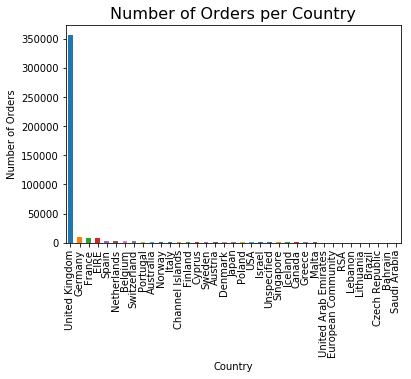

In [10]:
# Number of orders made by each country
total_orders=df.groupby('Country')['Quantity'].count().sort_values(ascending=False)
total_orders.plot('bar')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Country', fontsize=16)
plt.show()

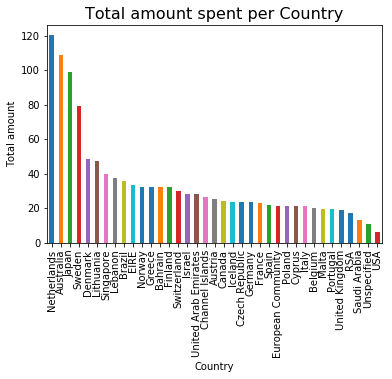

In [11]:
#Total amount spent per country
total_amount=df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False)
total_amount.plot('bar')
plt.xlabel('Country')
plt.ylabel('Total amount')
plt.title('Total amount spent per Country', fontsize=16)
plt.show()

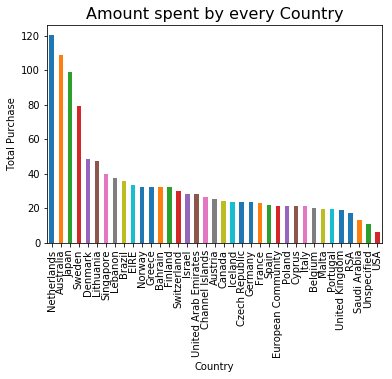

In [12]:
#Mean amount spent per country plot
mean_amount=df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False)
mean_amount.plot('bar')
plt.xlabel('Country')
plt.ylabel('Total Purchase')
plt.title('Amount spent by every Country', fontsize=16)
plt.show()

**ANALYSIS:** These anaysis show that even though the maximum number of orders are from United Kingdom, the mean amount spent in these purchases is very low as compared to higher countries.

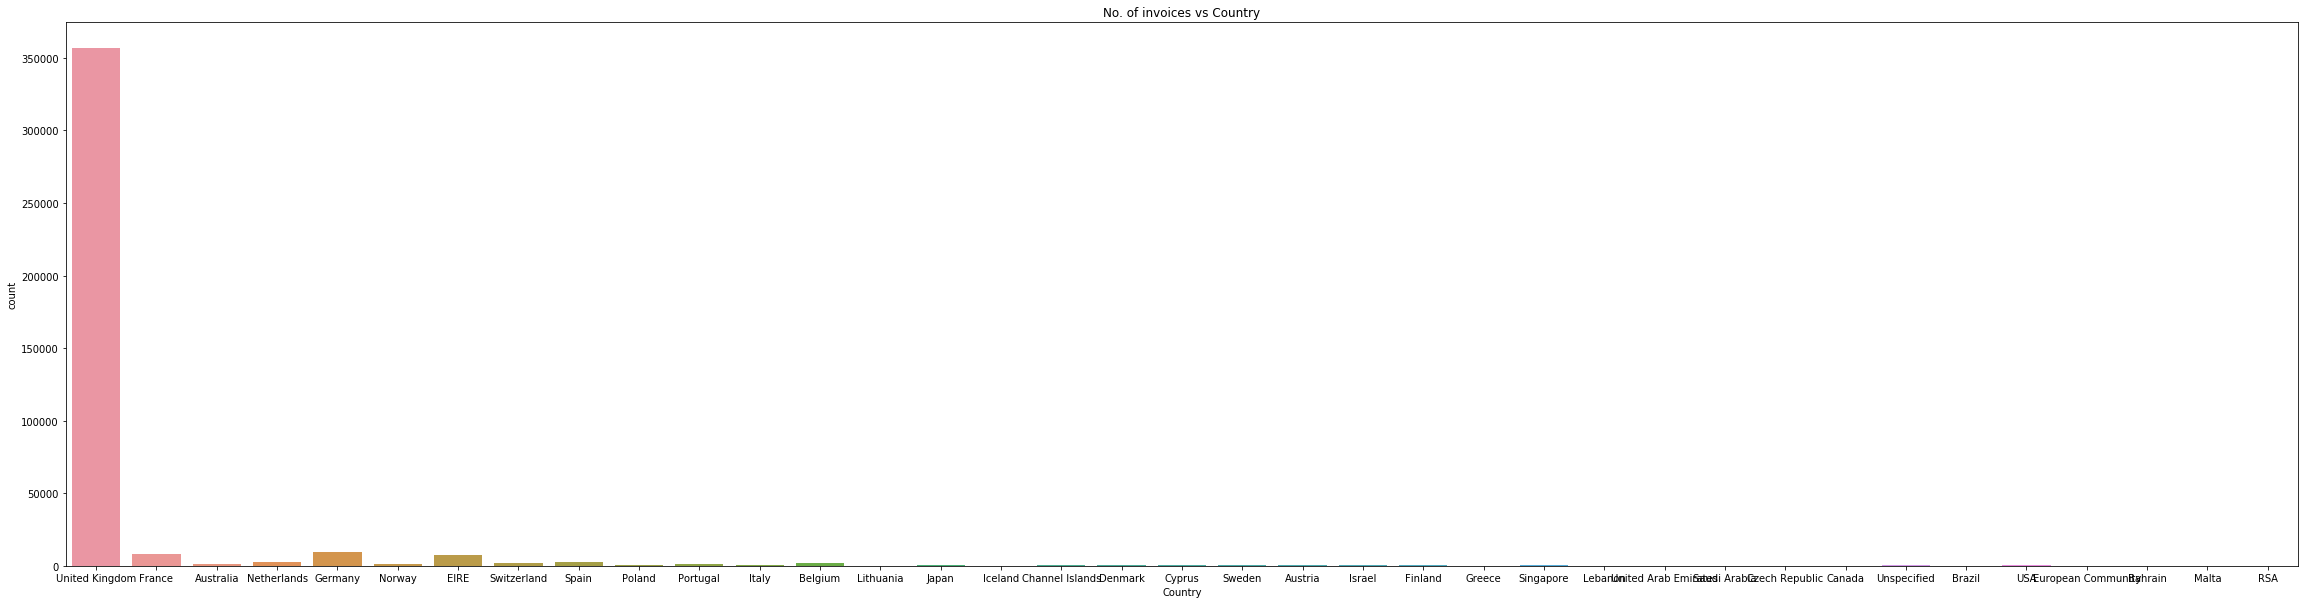

In [13]:
# Distribuition of purchases in the website according to Countries
plt.figure(figsize=(40,10))
plt.title('No. of invoices vs Country');
sns.countplot(x='Country', data=df);

In [14]:
df['Description'] = pd.Categorical(df['Description'])
df['descriptioncode'] = df['Description'].cat.codes
# df['Description'].replace(to_replace=df['descriptioncode'], inplace=True)
df.drop(columns=['Description'], inplace=True)

In [15]:
df['Country'] = pd.Categorical(df['Country'])
df['countrycode'] = df['Country'].cat.codes
df.drop(columns=['Country'], inplace=True)

In [ ]:
#Maximum cancellations are from which country
#Which maximum sales are performed at what date in each country
#Mean time does each country purchase
#Highest purchasing customers belong to which country
#Word occurrence

In [16]:
print(df)

       InvoiceNo StockCode  Quantity      InvoiceDate  UnitPrice  CustomerID  \
0         536365    85123A         6   12/1/2010 8:26       2.55     17850.0   
1         536365     71053         6   12/1/2010 8:26       3.39     17850.0   
2         536365    84406B         8   12/1/2010 8:26       2.75     17850.0   
3         536365    84029G         6   12/1/2010 8:26       3.39     17850.0   
4         536365    84029E         6   12/1/2010 8:26       3.39     17850.0   
5         536365     22752         2   12/1/2010 8:26       7.65     17850.0   
6         536365     21730         6   12/1/2010 8:26       4.25     17850.0   
7         536366     22633         6   12/1/2010 8:28       1.85     17850.0   
8         536366     22632         6   12/1/2010 8:28       1.85     17850.0   
9         536367     84879        32   12/1/2010 8:34       1.69     13047.0   
10        536367     22745         6   12/1/2010 8:34       2.10     13047.0   
11        536367     22748         6   1

In [20]:
d={'Customer_ID': df['CustomerID'], 'Description': df['descriptioncode'], 'Quantity': df['Quantity'], 'Unit_Price': df['UnitPrice']}
X = pd.DataFrame(d)

In [22]:
y_d = {'Country': df['countrycode']}
Y=pd.DataFrame(y_d)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import cross_val_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0) 

In [ ]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

d:\python\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(accuracy)
print(cm)